In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.style.use('classic')

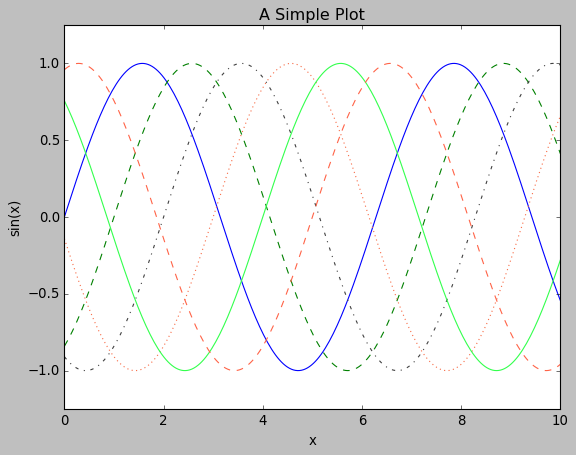

In [2]:
# line plots: let's plot a bunch of sine waves
# fig = plt.figure()
ax = plt.axes()

ax.set(xlim=(0, 10), ylim=(-1.25, 1.25),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot')

x = np.linspace(0, 10, 250)
ax.plot(x, np.sin(x - 0), color='blue', linestyle='-')
ax.plot(x, np.sin(x - 1), color='g', linestyle='--')
ax.plot(x, np.sin(x - 2), color='0.25', linestyle='-.')
ax.plot(x, np.sin(x - 3), color='#f86943', linestyle=':')
ax.plot(x, np.sin(x - 4), color=(0.2,1.0,0.3), linestyle='-')
ax.plot(x, np.sin(x - 5), color='tomato', linestyle='--')

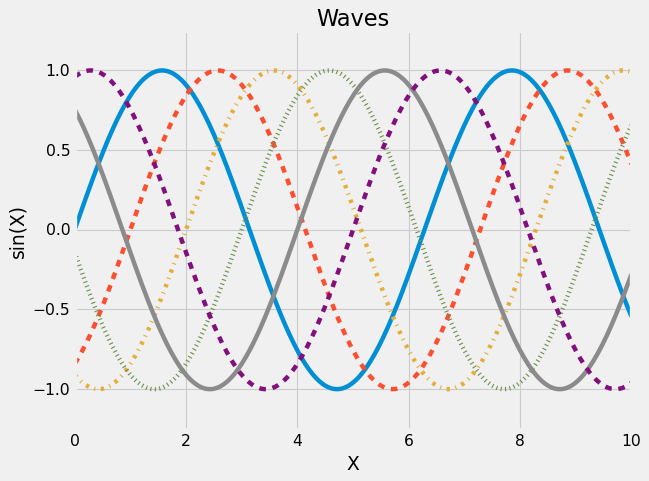

In [3]:
# let's try that with a style context and default colours
with plt.style.context('fivethirtyeight'):
  ax = plt.axes()

  ax.set(xlim=(0, 10), ylim=(-1.25, 1.25),
        xlabel='X', ylabel='sin(X)',
        title='Waves')

  x = np.linspace(0, 10, 250)
  ax.plot(x, np.sin(x - 0), linestyle='-')
  ax.plot(x, np.sin(x - 1), linestyle='--')
  ax.plot(x, np.sin(x - 2), linestyle='-.')
  ax.plot(x, np.sin(x - 3), linestyle=':')
  ax.plot(x, np.sin(x - 4), linestyle='-')
  ax.plot(x, np.sin(x - 5), linestyle='--')

plt.savefig('mpl_1_waves.png')

Let's load that image we saved above in this markdown cell.

![Sine Wave](./mpl_1_waves.png)

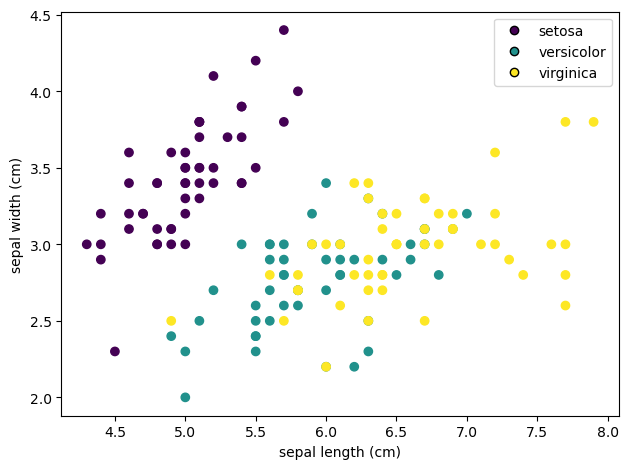

In [4]:
# scatter plots using Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.data.head())

# specify feature index in data set
x_ndx = 0
y_ndx = 1

# didn't like the look of classic stylesheet
with plt.style.context('default'):
  scatter = plt.scatter(iris.data[:, x_ndx], iris.data[:, y_ndx], c=iris.target)
  plt.xlabel(iris.feature_names[x_ndx])
  plt.ylabel(iris.feature_names[y_ndx])

  plt.tight_layout()

  labels = np.unique(iris.target)
  handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
  plt.legend(handles, iris.target_names)

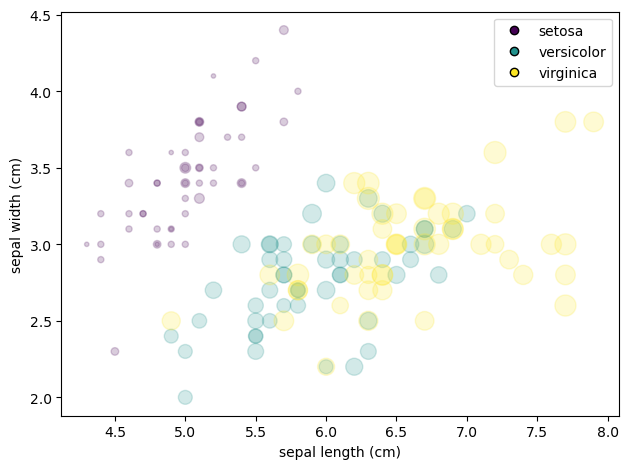

In [5]:
# Now let's get more creative
# we set size of each point based on petal width
sz_ndx = 3

with plt.style.context('default'):
  plt.scatter(iris.data[:, x_ndx], iris.data[:, y_ndx], alpha=0.2,
              s=100*iris.data[:, sz_ndx], c=iris.target)
  plt.xlabel(iris.feature_names[x_ndx])
  plt.ylabel(iris.feature_names[y_ndx])

  plt.tight_layout()

  labels = np.unique(iris.target)
  handles = [plt.Line2D([],[],marker="o", ls="", 
                    color=scatter.cmap(scatter.norm(yi))) for yi in labels]
  plt.legend(handles, iris.target_names)

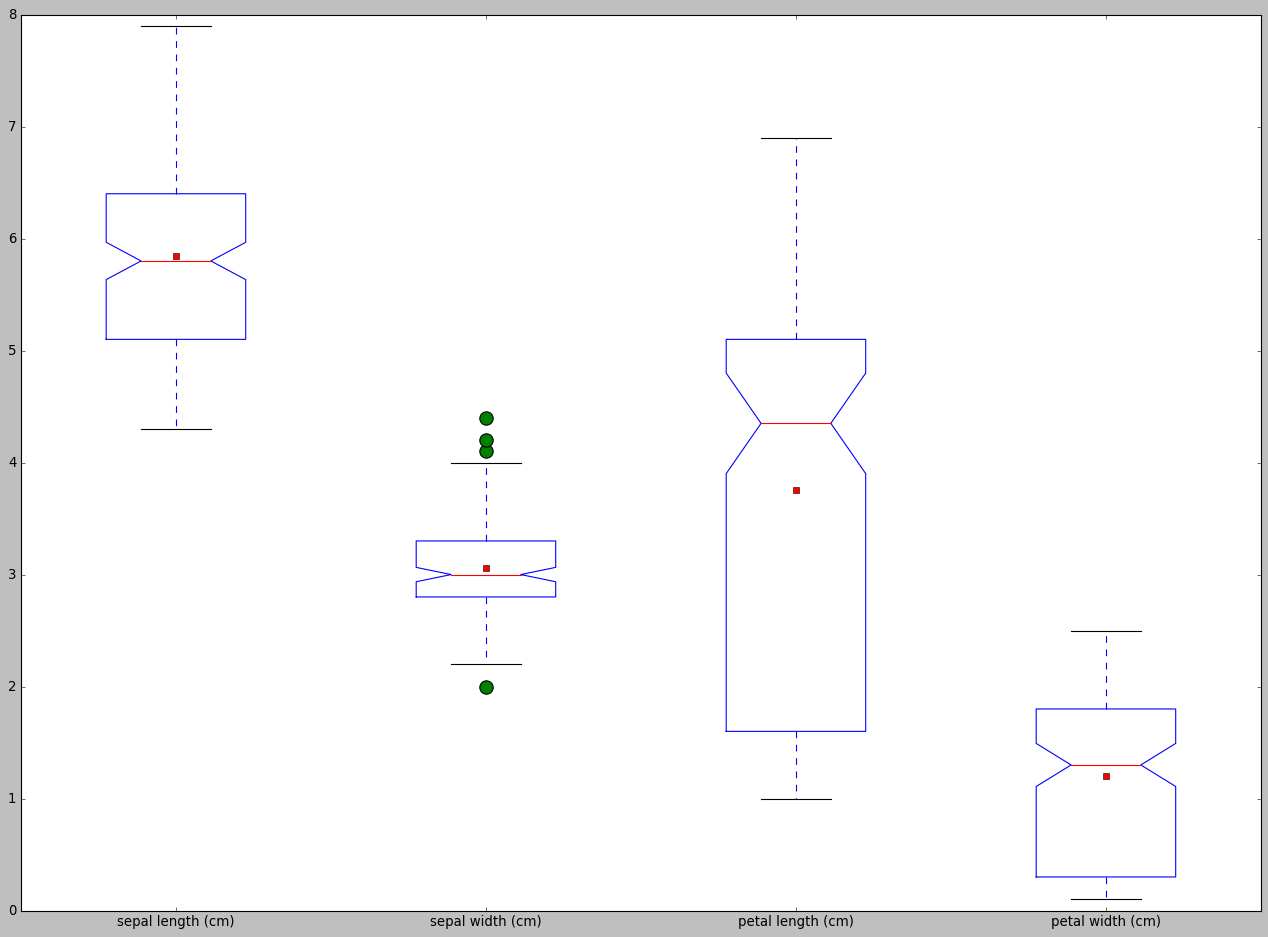

In [6]:
# print(type(iris))
# print(iris.keys())
# Now a quick look at boxplots
data = iris.data[:,0:4] # read the values of the first 4 columns

# show plot
fig = plt.figure(figsize =(20, 14))
labels = iris.feature_names
# ticks = range(1, len(iris.feature_names)+1)
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')
plt.boxplot(data, showmeans=True, flierprops=flierprops, notch=True, labels=labels);
# plt.boxplot(data, showmeans=True, flierprops=flierprops)
# plt.xticks(ticks, labels);

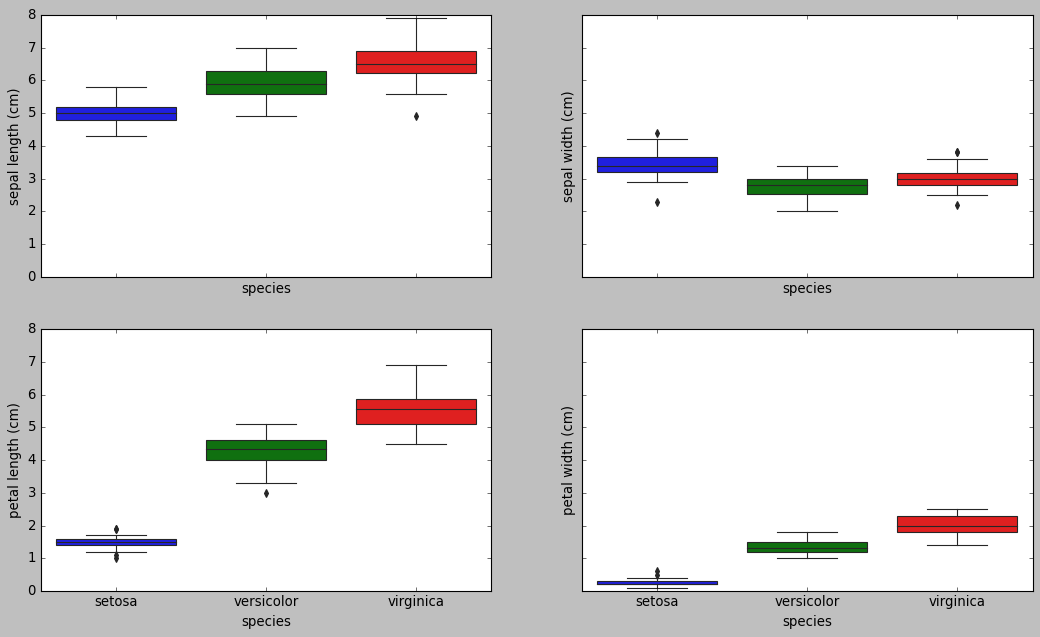

In [7]:
# let's get a different look using Seaborn
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

# print(iris.target_names)
df['species'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
# df.head()
fig, axes = plt.subplots(2, 2, figsize=(16,9), sharey=True, sharex=True)
sns.boxplot(x="species", y="sepal length (cm)", data=df, ax=axes[0,0])
sns.boxplot(x="species", y="sepal width (cm)", data=df, ax=axes[0,1])
sns.boxplot(x="species", y="petal length (cm)", data=df, ax=axes[1,0])
sns.boxplot(x="species", y="petal width (cm)", data=df, ax=axes[1,1]);

<Figure size 1280x720 with 0 Axes>

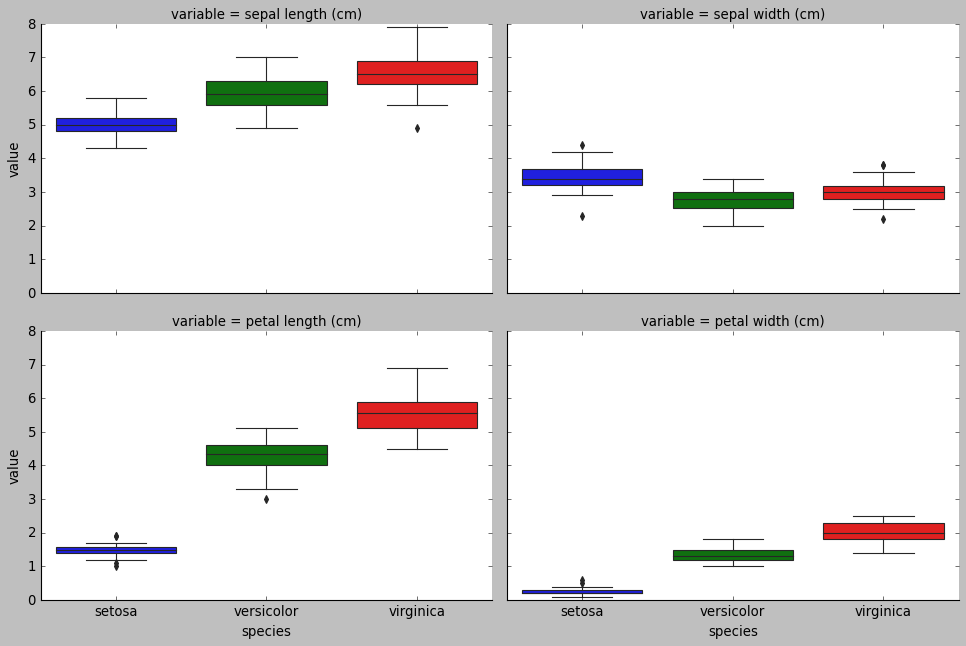

In [8]:
# print(df.head())
df_1 = df.drop('target', axis=1)
flat_iris = df_1.melt(id_vars='species')
# print(flat_iris.head())

fig = plt.figure(figsize=(16,9))
sns.catplot(
    data=flat_iris, x='species', y='value',
    col='variable', kind='box', col_wrap=2,
    height=4, aspect=1.5
);